# Passenger's satisfaction with an airline

Problem:   Passengers' satisfaction with an airline and what factors are most related to his satisfaction

* Data taken from:     https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction.   
* Original data from:  https://www.kaggle.com/johndddddd/customer-satisfaction  
* The data has been cleaned up for classification purposes.



## Content
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [42]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score,confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [43]:
#importing the train and test files

train_df = pd.read_csv(r"C:\Users\Abhishek Mehra\Desktop\Workspace\Airline Passenger Satisfaction\train.csv")
test_df = pd.read_csv(r"C:\Users\Abhishek Mehra\Desktop\Workspace\Airline Passenger Satisfaction\test.csv")

### EDA-Explanatory Data Analysis

* 24 columns in train and test dataset

* Approx 100000 and 26000 rows in train and test dataset respectively

In [44]:
#checking number of rows and columns

train_df.shape,test_df.shape

((103904, 25), (25976, 25))

Viewing first 5 rows

* `Unnamed: 0` and `ID` columns can be dropped since they do not provide valuable information.


In [45]:
#to diplay all columns otherwise pandas truncate(shortens) the columns
# pd.set_option("display.max_columns",None)
pd.options.display.max_columns=100

#Viewing first 5 rows
train_df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [46]:
#viewing first 5 rows of test dataset

test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


*Observations:*
* Both categorical and continuos data columns in the datasets  
* int64,float64,and string data types in columns  
* Few missing values in "arrival delay in minutes"in test and train data  

In [47]:
#data type and non-missing
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

*Observation*
* 310 and 83 values missing in train and test dataset from "arrival delay in minutes column".


In [49]:
#counting number of missing values
train_df['Arrival Delay in Minutes'].isnull().sum(),test_df['Arrival Delay in Minutes'].isnull().sum()

(310, 83)

*Statistical summary of columns*
* Columns with string variables have mostly 2 uniques variables.

In [50]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [51]:
test_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [52]:
train_df.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [53]:
test_df.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,25976,25976,25976,25976,25976
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,13172,21177,18038,12495,14573


* All values in `ID` and `Unnamed: 0` column are unique.Dropping 'id' column since it does not provide any info.

In [54]:
train_df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [55]:
test_df.nunique()

Unnamed: 0                           25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

In [56]:
#dropping id column and unnamed columns
test_df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
train_df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

*Visualizations*

Visualizing distribution of a few features and target column-  
* Ratio of number is men and women is similar   
* Most passengers among 20 to 60 age groups.  
* Number of loyal customers is very high with respect to disloyal customers  
* Larger number of people under travelling under Business category  
* The target column `satisfaction` is balanced  

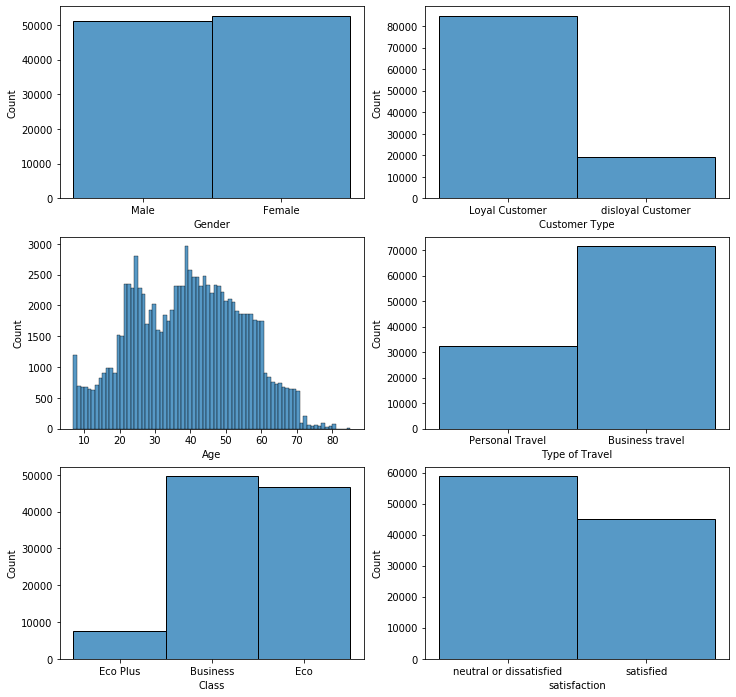

In [57]:
#setting number of rows,cols,figsizes
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(12,12))
features=['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']
for i,feature in enumerate(features):
    plt.subplot(3,2,i+1)
    sn.histplot(train_df[feature])

plt.show()    

*Observations*  
`Gender`:Ratio of satisfied and dissatisfied males and female is similar




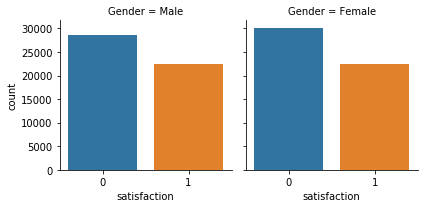

In [58]:
train_df['satisfaction'].replace({'satisfied':1,'neutral or dissatisfied':0},inplace=True)
test_df['satisfaction'].replace({'satisfied':1,'neutral or dissatisfied':0},inplace=True)

sn.catplot(x='satisfaction',col='Gender',data=train_df,kind='count',height=3,aspect=1)

`Customer Type`:Satisfaction level amongst Loyal customers is similar,  
Disloyal customer are more dissatisfied or neutral,  
Ratio of satisfaction amongst loyal customers is similar

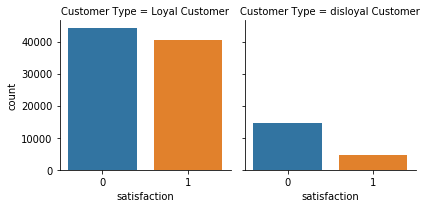

In [59]:
sn.catplot(x='satisfaction',col='Customer Type',data=train_df,kind='count',height=3,aspect=1)

`Gate location` More Number of People who have to pass through gate 3 show high dissatifaction

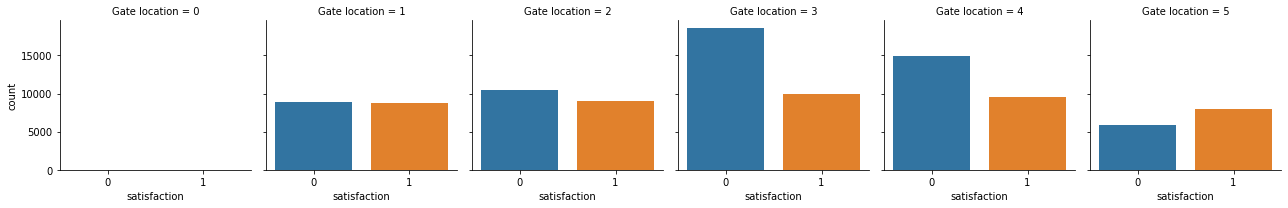

In [60]:
sn.catplot(x='satisfaction',col='Gate location',data=train_df,kind='count',height=3,aspect=1)

`Gate location` People travelling for busines purposes are the most satified than compared to people travelling for personal cause


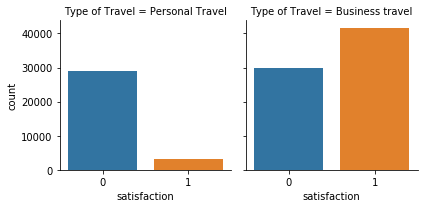

In [61]:
sn.catplot(x='satisfaction',col='Type of Travel',data=train_df,kind='count',height=3,aspect=1)

`Class` People travelling in Business class are more happy than people in economical class

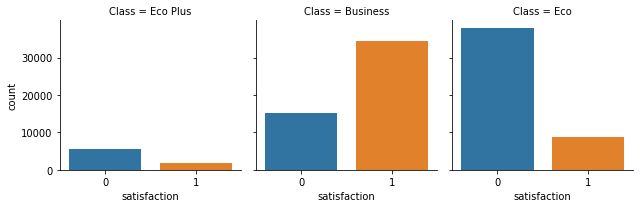

In [62]:
sn.catplot(x='satisfaction',col='Class',data=train_df,kind='count',height=3,aspect=1)

`Wfif service` Ease of online booking and inflight wifi service-More number of People highly dissatisfied with the airline are not happy with these 2 services

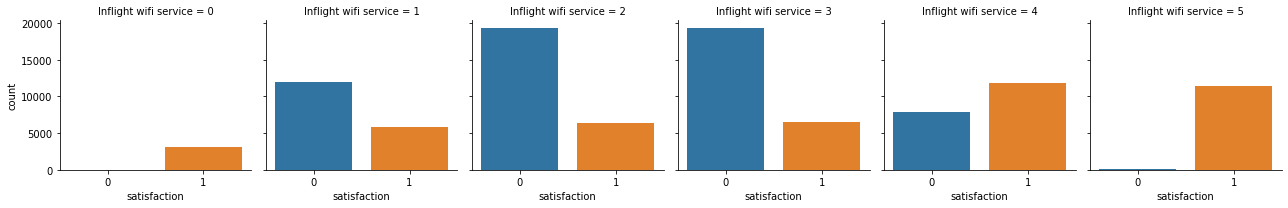

In [63]:
sn.catplot(x='satisfaction',col='Inflight wifi service',data=train_df,kind='count',height=3,aspect=1)

Comparing satisfaction level of people as per class of travel

`Flight Distance` More number of Passengers in Business class whether travelling for personal or business purpose are satisfied over any distance.   

In Eco and eco plus  distribution of passenger's satifaction is similar


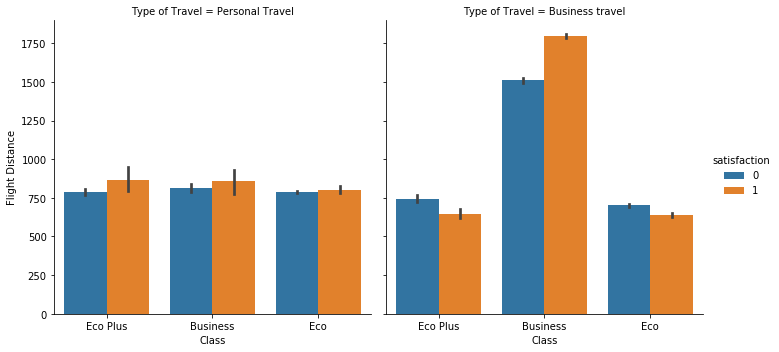

In [64]:
sn.catplot(hue='satisfaction',x='Class',y='Flight Distance',col='Type of Travel',data=train_df,kind='bar')

`Business Travel` -More Passengers have higher seat comfort level

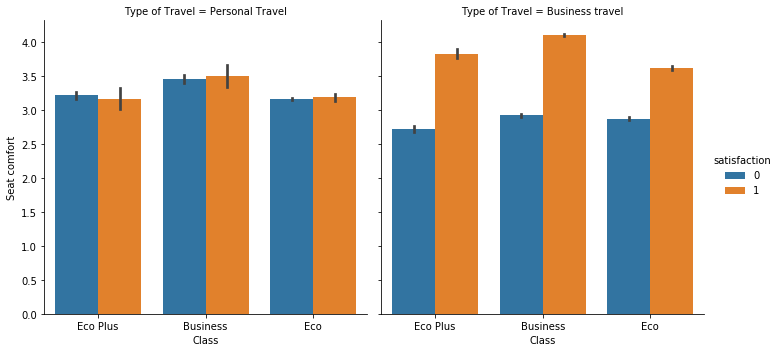

In [65]:
sn.catplot(data=train_df,x='Class',hue='satisfaction',col='Type of Travel',y='Seat comfort',kind='bar')

`Food and Drink` - Greater numberPassengers travelling in Business class for business purposes are more satisfied

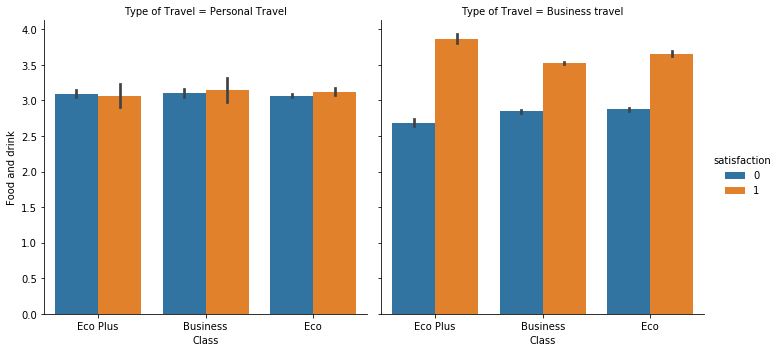

In [66]:
sn.catplot(data=train_df,x='Class',hue='satisfaction',col='Type of Travel',y='Food and drink',kind='bar')

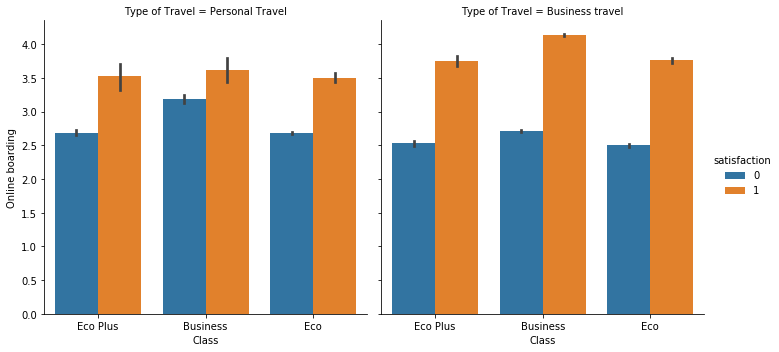

In [67]:
sn.catplot(data=train_df,x='Class',hue='satisfaction',col='Type of Travel',y='Online boarding',kind='bar')

Higher number of passengers travelling in Business class(for Business) show higher satisfaction level

Satisfaction count wrt to `Age`  
More number of Passengers from the age 39 to 60 are  satisfied  
passegers between the age 21 to 39 and 61 to 70 are the most neutral or dissatisfied

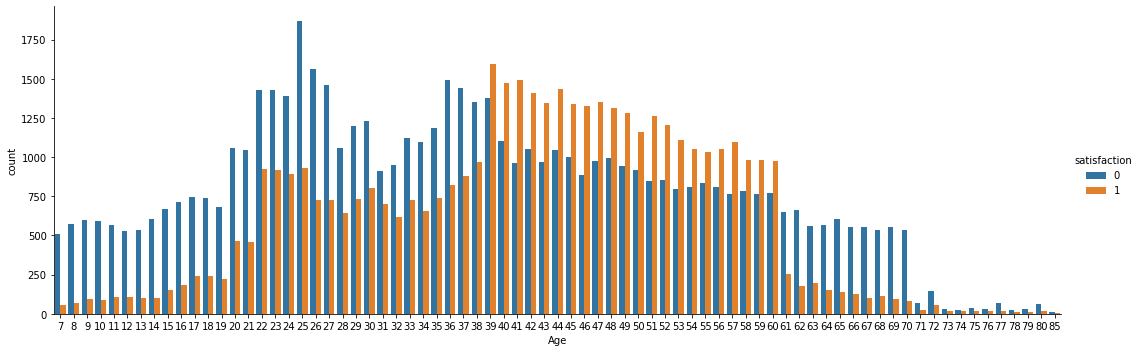

In [68]:
sn.catplot(hue='satisfaction',x='Age',data=train_df,aspect=3,kind='count')

### Feature Engineering

*Missing values*   
Filling the missing values in arrival in delay column by mode.   
These missing values can be due to no delay in arrival.  

In [69]:
#finding mode of the column.Mode for both test and train datasets is 0.Number of missing values is minimal

train_df["Arrival Delay in Minutes"].mode(),test_df['Arrival Delay in Minutes'].mode()

(0    0.0
 dtype: float64,
 0    0.0
 dtype: float64)

In [70]:
#Replacing test and train datasets missing value with zero

train_df["Arrival Delay in Minutes"].fillna(0,inplace=True)
test_df["Arrival Delay in Minutes"].fillna(0,inplace=True)

*Converting age to groups*

In [71]:
#dividing age into 3 groups according to their satisfaction level chnages as seen in age distribution graph
age_group = pd.cut(x=train_df.Age,bins=[0,39,60,100],labels=[1,2,3])
train_df.insert(column='age_group',loc=2,value=age_group)

age_group = pd.cut(x=test_df.Age,bins=[0,39,60,100],labels=[1,2,3])
test_df.insert(column='age_group',loc=2,value=age_group)


#dropping age column
train_df.drop('Age',axis=1,inplace=True)
test_df.drop('Age',axis=1,inplace=True)


*Label Encoding* -Type of travel,Class,Customer type,Age

In [72]:
df = pd.concat([train_df.assign(ind='train'),test_df.assign(ind='test')])
col_encode=['Class','Type of Travel','Customer Type','Gender','age_group']
label_en=LabelEncoder()
df[col_encode]=df[col_encode].apply(label_en.fit_transform)

train_df,test_df = df[df['ind'].eq('train')],df[df['ind'].eq('test')]
train_df = train_df.drop('ind',axis=1)
test_df = test_df.drop('ind',axis=1)

In [73]:
train_df.head()

,Gender,Customer Type,age_group,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,0,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,0,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,0,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,2,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [74]:
#dropping target column 
X_train= train_df.drop(['satisfaction'],axis=1)
X_test= test_df.drop(['satisfaction'],axis =1)

#assigning target column to `y_train` and `y_test`
y_train=train_df.satisfaction
y_test=test_df.satisfaction

#applying 

# Applying Models   
*AUC(Area under curve) ROC( receiver operating characteristics) mertric is suitable since the target is balanced.*

It is a probability curve that plots TPR(True positive rate-how many postives are rightly classified) against FPR(False positive rate- how many negatives are incorrecly classified)  
It measures the ability of the classifier to distinguish between positive and negative classes

In [75]:
#Defining a function that receives model, test and train data. 
def run_model(model,X_train,X_test,y_train,y_test):
    #fitting train data and target data for model training and feedback
    model.fit(X_train,y_train)
    
    #making predictions on test data
    predict=model.predict(X_test)
    print(predict)
    
    #determining ROC score
    roc=roc_auc_score(predict,y_test)
    print (roc)
    
    #printing classification report
    print(classification_report(y_test,predict,digits=5))
    
    #plotting confusion matrix
    plot_confusion_matrix(model,X_test,y_test,normalize='all')

In [76]:
train_df.head()

,Gender,Customer Type,age_group,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,0,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,0,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,0,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,2,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [77]:
test_df.head()

,Gender,Customer Type,age_group,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,1,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,0,0,0,0,0,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,1,1,0,0,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,1,0,1,0,0,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,0,0,1,0,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1


### XGBClassifier 
ROC AUC = 0.958,
ROC AUC = 0.958, near to one- great separability i.e. classifier is able to predict between postive and negative points correctly  
`precision` fraction of correctly identified postives out of all <u>predicted</u> positives  
`recall` fraction of correctly identified positives out of all <u>actual</u> positives
 


[1 1 0 ... 0 1 0]
0.9583223390318534
              precision    recall  f1-score   support

           0    0.95194   0.97317   0.96244     14573
           1    0.96470   0.93721   0.95076     11403

    accuracy                        0.95738     25976
   macro avg    0.95832   0.95519   0.95660     25976
weighted avg    0.95754   0.95738   0.95731     25976



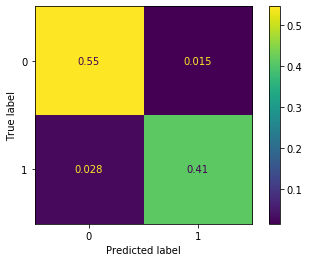

In [78]:
#n_estimators- number of modelling cycles
xg=XGBClassifier(n_estimators=200,learning_rate=0.2)

#calling model function to apply model and determining classification report
run_model(xg,X_train,X_test,y_train,y_test)

### RandomForestClassifier
ROC = 0.9623.


[1 1 0 ... 0 1 0]
0.9626074603861632
              precision    recall  f1-score   support

           0    0.95538   0.97708   0.96611     14573
           1    0.96983   0.94168   0.95555     11403

    accuracy                        0.96154     25976
   macro avg    0.96261   0.95938   0.96083     25976
weighted avg    0.96173   0.96154   0.96147     25976



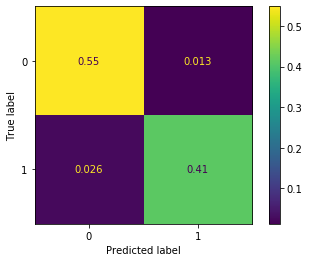

In [79]:
rfc = RandomForestClassifier()

#calling model function
run_model(rfc,X_train,X_test,y_train,y_test)

### Feature Importance
* To determine which feature has more impact on the satisfaction of the passenger.  
* feature_importances_for XGB is computed on `gain`.  
* feature_importances_ for RandomForest is computed on mean decrease in `impurity`. 


In [80]:
#function to determine feature importance

def feature_imp(model):
    
    importance = pd.DataFrame(data={'Attribute':train_df.columns.drop('satisfaction'),'Importance':model.feature_importances_})

    importance = importance.sort_values(by='Importance',ascending=False)
    
    plt.bar(x=importance.Attribute,height=importance.Importance)
    plt.xticks(rotation='vertical')
    plt.show()
    

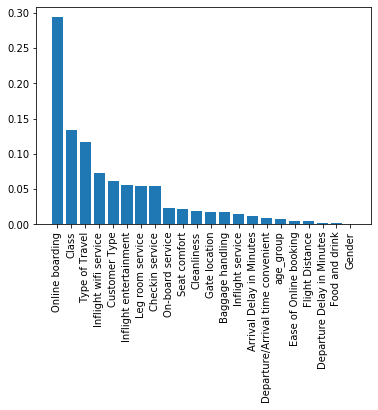

In [81]:
#plotting the feature_importances value as bar plot for XGB

feature_imp(xg)

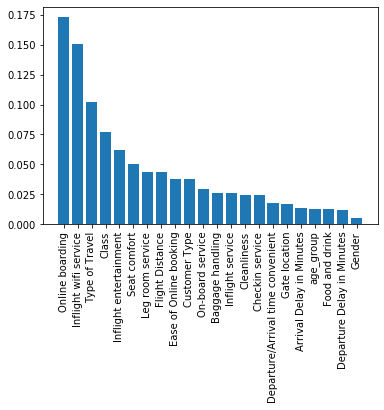

In [82]:
#feature importance for Random Forest Classifier

feature_imp(rfc)

# Conclusion 
*Random Forest Classifier*:  

`Online boarding`,`Inflight wifi service`,and `Type Of Travel` are the important features for predicting satisfaction.  

*XGB Classiifer*:

`Online Baording`,`class` and `Type of Travel` are the most important features for predicting satisfaction.
